In [4]:
# coding: UTF-8
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import h5py
import csv
import math
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

dir = '/Users/maeda/Desktop/'
'''
with open(dir+'SFPhi-R098-D1B1Z1.DAT') as f:
    reader = csv.reader(f)
    u = [row for row in reader]

Time=u[:,0]
Mtot=u[:,1]
MtotHI=u[:,2]
MtotH2=u[:,3]
MtotCO=u[:,4]
MtotHe=u[:,5]
MtotHItoMtot=u[:,6]
MtotH2toMtot=u[:7]
MtotCOtoMtot=u[:,8]
MtotHetoMtot=u[:,9]


#import numpy as np
#import matplotlib
#matplotlib.use('Agg')
#import matplotlib.pyplot as plt
#%matplotlib inline
'''

data = pd.read_csv(dir+'MassratioMol-nsp-crrect.csv')
#lux = data['LUX'].astype('int64')
#data = data.sort_values(by="LUX", ascending=True)
#log_data = np.log(data)
data

,stime,Mtot,MtotHI,MtotH2,MtotCO,MtotHe,Mtotp,MtotCO.1,MtotCp,MtotC,ntotH,ntotCsp,ntotHI,ntotH2,ntotCO,ntotHe,ntotp,ntotCO.1,ntotCp,ntotC
0,1.0,30540.600149,21566.843528,223.843231,0.000122,8631.785706,118.127685,0.000122,39.999405,0.035357,9.032819e+05,139.009773,8.986185e+05,4.663401e+03,0.000181,8.991443e+04,4921.986865,0.000181,138.886824,0.122768
1,2.0,55907.278914,38544.126349,1423.374791,0.105167,15801.248863,138.528913,0.105167,73.083540,0.158655,1.635659e+06,254.469676,1.606005e+06,2.965364e+04,0.156499,1.645963e+05,5772.038040,0.156499,253.762291,0.550886
2,3.0,79532.000749,53048.290820,3865.986876,0.467810,22478.380290,139.342763,0.467810,103.703464,0.352293,2.290887e+06,362.000856,2.210345e+06,8.054139e+04,0.696146,2.341498e+05,5805.948476,0.696146,360.081471,1.223238
3,4.0,105156.387388,67900.392796,7386.652086,2.010138,29720.679989,148.662515,2.010138,136.342073,0.642934,2.983072e+06,478.633663,2.829183e+06,1.538886e+05,2.991276,3.095904e+05,6194.271477,2.991276,473.409976,2.232411
4,5.0,128967.099249,80547.199765,11827.262007,3.645885,36450.377583,142.259894,3.645885,166.628336,0.868391,3.602535e+06,587.011281,3.356133e+06,2.464013e+05,5.425425,3.796914e+05,5927.495583,5.425425,578.570611,3.015246
5,6.0,154459.174272,93506.186917,17153.434349,7.237739,43655.282391,144.270616,7.237739,197.959840,1.414338,4.253454e+06,703.041896,3.896091e+06,3.573632e+05,10.770445,4.547425e+05,6011.275657,10.770445,687.360554,4.910897
6,7.0,178459.947562,104136.187257,23744.117262,13.171532,50438.699463,140.943581,13.171532,225.986014,2.306979,4.833677e+06,812.284500,4.339008e+06,4.946691e+05,19.600494,5.254031e+05,5872.649193,19.600494,784.673661,8.010345
7,8.0,203801.692959,114948.624761,31108.189210,22.068388,57601.114451,143.764536,22.068388,254.512028,3.187720,5.437613e+06,927.630654,4.789526e+06,6.480873e+05,32.839863,6.000116e+05,5990.189003,32.839863,883.722320,11.068471
8,9.0,227903.627061,123954.102422,39393.311694,29.796174,64413.116985,143.095957,29.796174,282.133567,3.848703,5.985448e+06,1037.333537,5.164754e+06,8.206940e+05,44.339545,6.709700e+05,5962.331525,44.339545,979.630442,13.363550
9,10.0,253334.728113,133712.371453,47874.292051,37.066272,71600.787012,147.277594,37.066272,311.819093,4.384173,6.568730e+06,1153.086153,5.571349e+06,9.973811e+05,55.158143,7.458415e+05,6136.566435,55.158143,1082.705185,15.222825


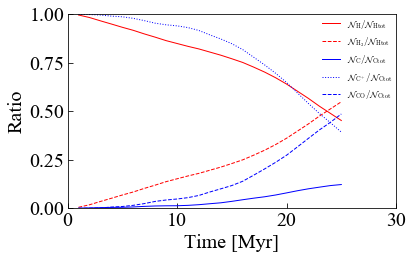

In [56]:
data_col = data.columns

fig = plt.figure()
#fig.subplots_adjust(bottom=0.21)
#fig.subplots_adjust(left=0.1)
#fig.subplots_adjust(right=0)
ax = fig.add_subplot(111)

plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['mathtext.default'] = 'it'
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
#plt.rcParams["xtick.minor.visible"] = True          #x軸補助目盛りの追加
#plt.rcParams["ytick.minor.visible"] = True          #y軸補助目盛りの追加
#plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
#plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
#plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
#plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 5                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 5                #y軸主目盛り線の長さ
#plt.rcParams["xtick.minor.size"] = 5                #x軸補助目盛り線の長さ
#plt.rcParams["ytick.minor.size"] = 5                #y軸補助目盛り線の長さ
plt.rcParams["font.size"] = 20                       #フォントの大きさ
#plt.rcParams["axes.linewidth"] = 1.5                 #囲みの太さ
plt.xlim([0.0, 30.0]) # x方向の描画範囲を指定
plt.ylim([0.0, 1.0]) # y方向の描画範囲を指定
plt.rcParams["legend.markerscale"] = 2
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.edgecolor"] = 'black'



#plt.figure(1)
'''
plt.plot(data[data_col[0]],data[data_col[6]],marker="o")
plt.plot(data[data_col[0]],data[data_col[7]],marker="o")
plt.plot(data[data_col[0]],data[data_col[8]]*100,marker="o")
plt.plot(data[data_col[0]],data[data_col[9]],marker="o")
'''
#plt.plot(data[data_col[0]],data[data_col[12]]/data[data_col[10]],marker="o")
#plt.plot(data[data_col[0]],data[data_col[13]]/data[data_col[10]],marker="o")

#plt.plot(data[data_col[0]],data[data_col[12]]/(data[data_col[12]]+2.0*data[data_col[13]]),marker="o", color='red' , linestyle = "dashed", markersize=2, linewidth = 1)
#plt.plot(data[data_col[0]],2.0*data[data_col[13]]/(data[data_col[12]]+2.0*data[data_col[13]]),marker="o", color='red',  linestyle = "solid", markersize=2, linewidth = 1)
#plt.plot(data[data_col[0]],data[data_col[12]]/(data[data_col[12]]+data[data_col[13]]),marker="o", color='red' , linestyle = "solid", markersize=2.5, linewidth = 1,label="$\mathcal{N}_\mathrm{HI}/\mathcal{N}_\mathrm{Htot}$")
#plt.plot(data[data_col[0]],data[data_col[13]]/(data[data_col[12]]+data[data_col[13]]),marker="s", color='red',  linestyle = "dashed", markersize=2.5, linewidth = 1,label="$\mathcal{N}_\mathrm{H2}/\mathcal{N}_\mathrm{Htot}$")
plt.plot(data[data_col[0]],data[data_col[12]]/(data[data_col[12]]+data[data_col[13]]), color='red' , linestyle = "solid", markersize=2.5, linewidth = 1,label="$\mathcal{N}_\mathrm{H}/\mathcal{N}_\mathrm{Htot}$")
plt.plot(data[data_col[0]],data[data_col[13]]/(data[data_col[12]]+data[data_col[13]]), color='red',  linestyle = "dashed", markersize=2.5, linewidth = 1,label="$\mathcal{N}_\mathrm{H_2}/\mathcal{N}_\mathrm{Htot}$")


#plt.plot(data[data_col[0]],data[data_col[19]]/data[data_col[11]],marker="o", color='blue',  linestyle= "solid", markersize=2.5, linewidth = 1,label="$\mathcal{N}_\mathrm{C}/\mathcal{N}_\mathrm{Ctot}$")
#plt.plot(data[data_col[0]],data[data_col[18]]/data[data_col[11]],marker="^", color='blue',  linestyle = "dotted", markersize=2.5, linewidth = 1,label="$\mathcal{N}_\mathrm{C^+}/\mathcal{N}_\mathrm{Ctot}$")
#plt.plot(data[data_col[0]],data[data_col[14]]/data[data_col[11]],marker="s", color='blue',  linestyle = "dashed", markersize=2.5, linewidth = 1,label="$\mathcal{N}_\mathrm{CO}/\mathcal{N}_\mathrm{Ctot}$")
plt.plot(data[data_col[0]],data[data_col[19]]/data[data_col[11]],color='blue',  linestyle= "solid", markersize=2.5, linewidth = 1,label="$\mathcal{N}_\mathrm{C}/\mathcal{N}_\mathrm{Ctot}$")
plt.plot(data[data_col[0]],data[data_col[18]]/data[data_col[11]],color='blue',  linestyle = "dotted", markersize=2.5, linewidth = 1,label="$\mathcal{N}_\mathrm{C^+}/\mathcal{N}_\mathrm{Ctot}$")
plt.plot(data[data_col[0]],data[data_col[14]]/data[data_col[11]],color='blue',  linestyle = "dashed", markersize=2.5, linewidth = 1,label="$\mathcal{N}_\mathrm{CO}/\mathcal{N}_\mathrm{Ctot}$")

#plt.plot(data[data_col[0]],data[data_col[18]]/data[data_col[11]],marker="o", color='blue',  linestyle = "dotted", markersize=2, linewidth = 1,label="$\mathcal{N}_\mathrm{C^+}/\mathcal{N}_\mathrm{Ctot}$")
#plt.plot(data[data_col[0]],data[data_col[19]]/data[data_col[11]],marker="o", color='blue',  linestyle= "solid", markersize=2, linewidth = 1,label="$\mathcal{N}_\mathrm{C}/\mathcal{N}_\mathrm{Ctot}$")

#plt.plot(data[data_col[0]],data[data_col[1]]/(data[data_col[1]]+2.0*data[data_col[2]]),marker="o", color='red' , linestyle = "dashed", markersize=5)
#plt.plot(data[data_col[0]],2.0*data[data_col[2]]/(data[data_col[1]]+2.0*data[data_col[2]]),marker="o", color='red',  linestyle = "solid", markersize=5)


#plt.plot(data[data_col[0]],data[data_col[4]]/(data[data_col[4]]+data[data_col[5]]+data[data_col[6]]),marker="o", color='blue', linestyle = "solid", markersize=5)
#plt.plot(data[data_col[0]],data[data_col[5]]/(data[data_col[4]]+data[data_col[5]]+data[data_col[6]]),marker="o", color='blue',  linestyle = "dashed", markersize=5)
#plt.plot(data[data_col[0]],data[data_col[6]]/(data[data_col[4]]+data[data_col[5]]+data[data_col[6]]),marker="o", color='blue',  linestyle= "dashdot", markersize=5)


#plt.plot(data[data_col[0]],data[data_col[12]]/(data[data_col[12]]+2.0*data[data_col[13]]+data[data_col[16]]),marker="o")
#plt.plot(data[data_col[0]],2.0*data[data_col[13]]/(data[data_col[12]]+2.0*data[data_col[13]]+data[data_col[16]]),marker="o")

#グラフの軸
#plt.xlabel(data[data_col[0]].name)
#plt.ylabel(data[data_col[1]].name)
#plt.ylabel(data[data_col[7]].name)
#ax.set_title('Scatter plot')
ax.set_xlabel('Time [Myr]')
ax.set_ylabel('Ratio')

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=5,frameon=False)
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=9,frameon=False)

#plt.xticks(np.arange(0, 60 + 1, 10))
#plt.yticks(np.arange(0, 20 + 1, 5))
#p = plt.plot([0.0, 60.0],[10.0, 10.0], "black", linestyle='dashed') # normal way
#p = plt.plot([0.0, 60.0],[7.6, 7.6], "red", linestyle='dashed') # normal way
#p = plt.plot([0.0, 60.0],[12.7, 12.7], "blue", linestyle='dashed') # normal way
fig.tight_layout()
#グラフ表示
plt.show()
#plt.figure(figsize=(5, 6))

# 保存するPDFファイル名
pp = PdfPages(dir+'test.pdf')
# 画像をPDFとして保存する
pp.savefig(fig)
# PDFの保存終了
pp.close()
#plt.savefig("R-Vesc.png")
